# **Proyek Predictive Analytics : Klasifikasi pada Kualitas Pisang**

- Nama: Jessindy Tanuwijaya
- Email: tanjess676@gmail.com
- ID Dicoding: jessdytan

## 1. Import Library/Packages

In [ ]:
# Sistem & File Handling
import os                         # Operasi sistem file & direktori
import shutil                     # Menyalin dan memindahkan file
import zipfile                    # Menangani file ZIP (ekstraksi, kompresi)
import io                         # Operasi I/O berbasis memori
from pathlib import Path          # Representasi path file & direktori modern

# Operasi Numerik & Data
import math                       # Fungsi matematika dasar
import numpy as np                # Operasi array, vektor, dan matriks
import pandas as pd               # Manipulasi dan analisis data tabular

# Visualisasi Data
import matplotlib.pyplot as plt   # Visualisasi dasar (plot, histogram, dll.)
import seaborn as sns             # Visualisasi statistik (heatmap, boxplot, dll.)

# Preprocessing
from sklearn.preprocessing import LabelEncoder  # Mengubah label kategorik jadi numerik
from sklearn.preprocessing import StandardScaler  # Standarisasi fitur (mean=0, std=1)

# Model Machine Learning
from sklearn.linear_model import LogisticRegression         # Model klasifikasi linier
from sklearn.neighbors import KNeighborsClassifier          # Algoritma K-NN
from sklearn.ensemble import RandomForestClassifier         # Random Forest (model ensambel)

# Evaluasi Model
from sklearn.metrics import (confusion_matrix,              # Matriks kebingungan
                             precision_score,               # Skor presisi
                             recall_score,                  # Skor recall
                             f1_score,                      # Skor F1
                             accuracy_score,                # Skor akurasi
                             classification_report)         # Laporan klasifikasi lengkap

# Split Data & Optimasi Model
from sklearn.model_selection import train_test_split        # Membagi data latih & uji
from sklearn.model_selection import cross_val_score         # Validasi silang
from sklearn.model_selection import KFold                   # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV            # Pencarian grid hyperparameter
from sklearn.model_selection import RandomizedSearchCV      # Pencarian acak hyperparameter

# Scikit-learn Shortcut
import sklearn as sk                # Shortcut opsional untuk cek versi atau struktur

## 2. Data Wrangling

### 2.1 Download and Extract Dataset From Kaggle

Langkah-langkah untuk Mendapatkan kaggle.json:
1. Login ke Kaggle:
  
  Pergi ke Kaggle dan login menggunakan akun kamu. Jika belum punya akun, Anda bisa mendaftar terlebih dahulu.

2. Buka Halaman Akun Anda:
  
  Setelah login, klik ikon profil di sudut kanan atas halaman, kemudian pilih "**My Account**" dari dropdown menu.

3. Scroll ke Bagian API:
  
  Di halaman "Account", scroll ke bawah sampai menemukan bagian yang bernama "API". Di bagian ini ada tombol "**Create New API Token**". Klik tombol tersebut untuk membuat token API baru.

4. Download kaggle.json:

  Setelah klik tombol "Create New API Token", file kaggle.json akan otomatis diunduh ke komputer Anda.File ini berisi dua informasi penting: username dan key, yang akan digunakan untuk mengakses Kaggle API.





In [ ]:
from google.colab import files, userdata
# upload kaggle.json
files.upload()

Kode di bawah bertujuan untuk menyiapkan kredensial API Kaggle dengan cara memindahkan file kaggle.json ke folder yang tepat di Google Colab, sehingga API Kaggle dapat digunakan untuk mengakses dataset atau model secara otomatis dan aman.

In [3]:
# Buat folder .kaggle di home directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Pindahkan kaggle.json ke folder tersebut
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

# Ubah permission supaya hanya bisa dibaca oleh user
os.chmod('/root/.kaggle/kaggle.json', 600)

Setelah menjalankan perintah dibawah ini, file zip dataset akan diunduh ke direktori kerja saat ini di Google Colab. Anda dapat mengekstrak dan menggunakannya untuk proyek Anda.

In [4]:
!kaggle datasets download -d l3llff/banana

Dataset URL: https://www.kaggle.com/datasets/l3llff/banana
License(s): apache-2.0


Mengekstrak seluruh isi file zip ke dalam folder dataset. Folder ini akan dibuat secara otomatis jika belum ada.

In [5]:
with zipfile.ZipFile("banana.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

### 2.2 Assessing Data

Membaca dan mengimpor dataset kualitas pisang.

In [35]:
df = pd.read_csv('/content/dataset/banana_quality.csv')

Menampilkan 5 data teratas

In [36]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


Menampilkan informasi gambaran umum dataset

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [38]:
# Mengetahui berapa banyak baris dan kolom
print("Banyak Baris:",df.shape[0])
print("Banyak Kolom:", df.shape[1])

Banyak Baris: 8000
Banyak Kolom: 8


Menampilkan data statistik dataset

In [39]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


Mengecek data duplikat

In [41]:
df.duplicated().sum()

np.int64(0)

Hasil menunjukkan bahwa tidak ada data duplikat dalam dataset ini.

Mengecek data hilang

In [40]:
df.isnull().sum()

,0
Size,0
Weight,0
Sweetness,0
Softness,0
HarvestTime,0
Ripeness,0
Acidity,0
Quality,0


Tidak ada data yang hilang dalam dataset ini.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Boxplot untuk mengecek outlier

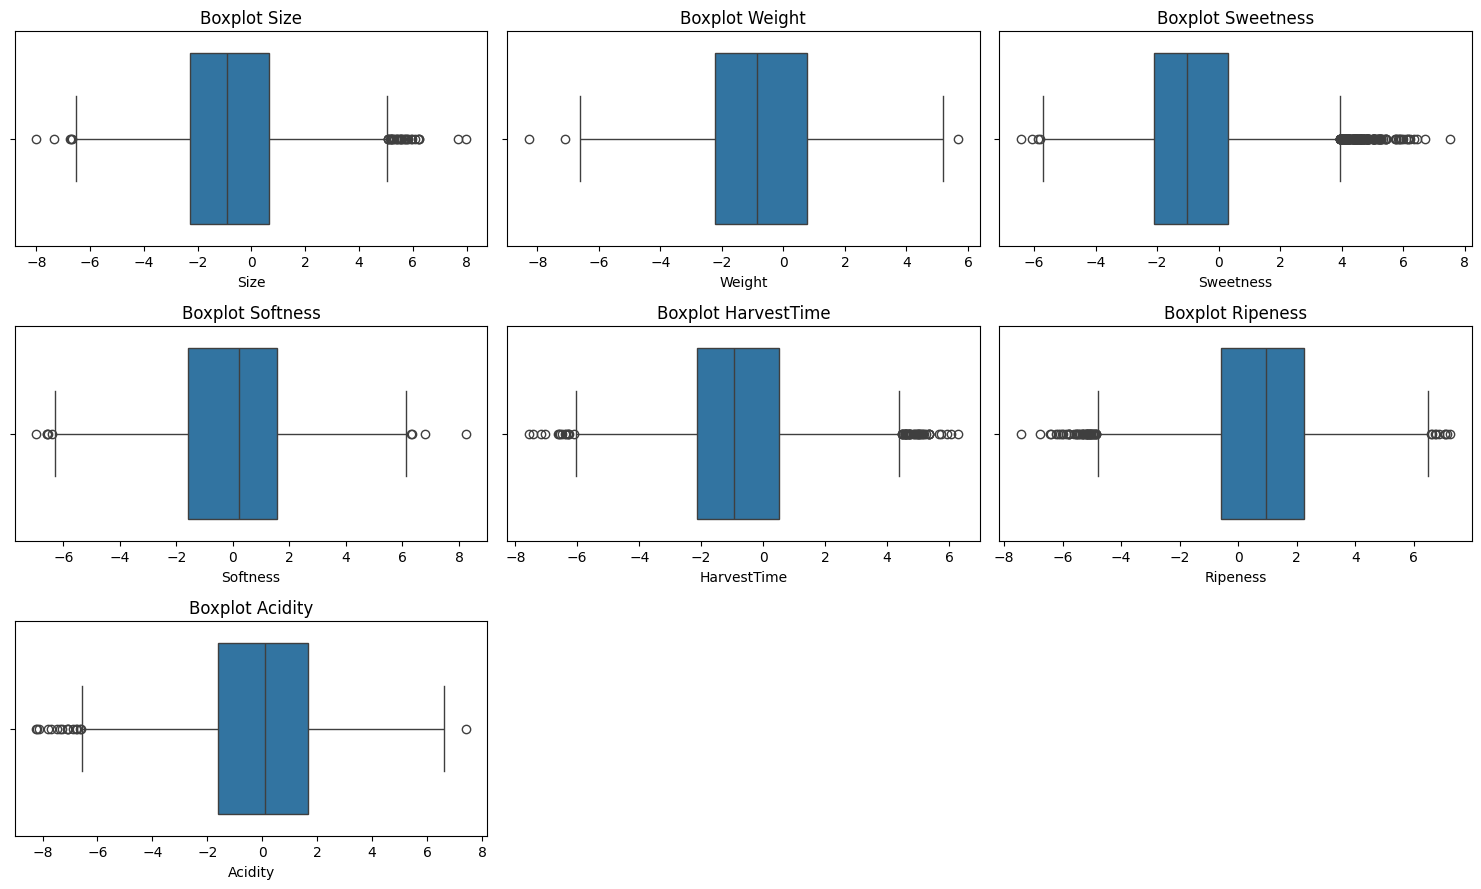

In [42]:
# Pilih hanya kolom numerik
numerical_cols = df.select_dtypes(exclude='object').columns

# Tentukan jumlah baris dan kolom untuk grid
n_cols = 3  # jumlah kolom yang diinginkan
n_rows = math.ceil(len(numerical_cols) / n_cols)  # hitung jumlah baris berdasarkan jumlah kolom

# Buat figure dan axes dengan grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()  # Ubah menjadi array 1D untuk iterasi mudah

# Plot setiap boxplot pada subplot masing-masing
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot {col}")

# Hapus subplot kosong jika jumlah variabel tidak pas dengan grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Dapat dilihat bahwa hampir keseluruhan kolom memiliki data outlier, untuk itu kita akan menghapusnya dengan menggunakan metode IQR.

In [43]:
def delete_outlier_iqr(df):
    df_clean = df.copy()
    for kolom in df_clean.select_dtypes(exclude='object').columns:
        q1 = df_clean[kolom].quantile(0.25)
        q3 = df_clean[kolom].quantile(0.75)
        iqr = q3 - q1
        batas_bawah = q1 - 1.5 * iqr
        batas_atas = q3 + 1.5 * iqr
        # Hanya simpan baris yang nilainya dalam rentang IQR
        df_clean = df_clean[(df_clean[kolom] >= batas_bawah) & (df_clean[kolom] <= batas_atas)]
    return df_clean

In [44]:
# Hapus outlier
df_clean = delete_outlier_iqr(df)

Setelah outlier dihapus, berikut adalah banyak baris dan kolom sekarang.

In [45]:
# Mengetahui berapa banyak baris dan kolom
print("Banyak Baris:",df_clean.shape[0])
print("Banyak Kolom:", df_clean.shape[1])

Banyak Baris: 7657
Banyak Kolom: 8


Karena tidak banyak baris yang dihapus (masih dibawah 30%), maka tindakan penghapusan baris yang memiliki data outlier sudah tepat.

### 3.2 Distribusi Data Numerikal

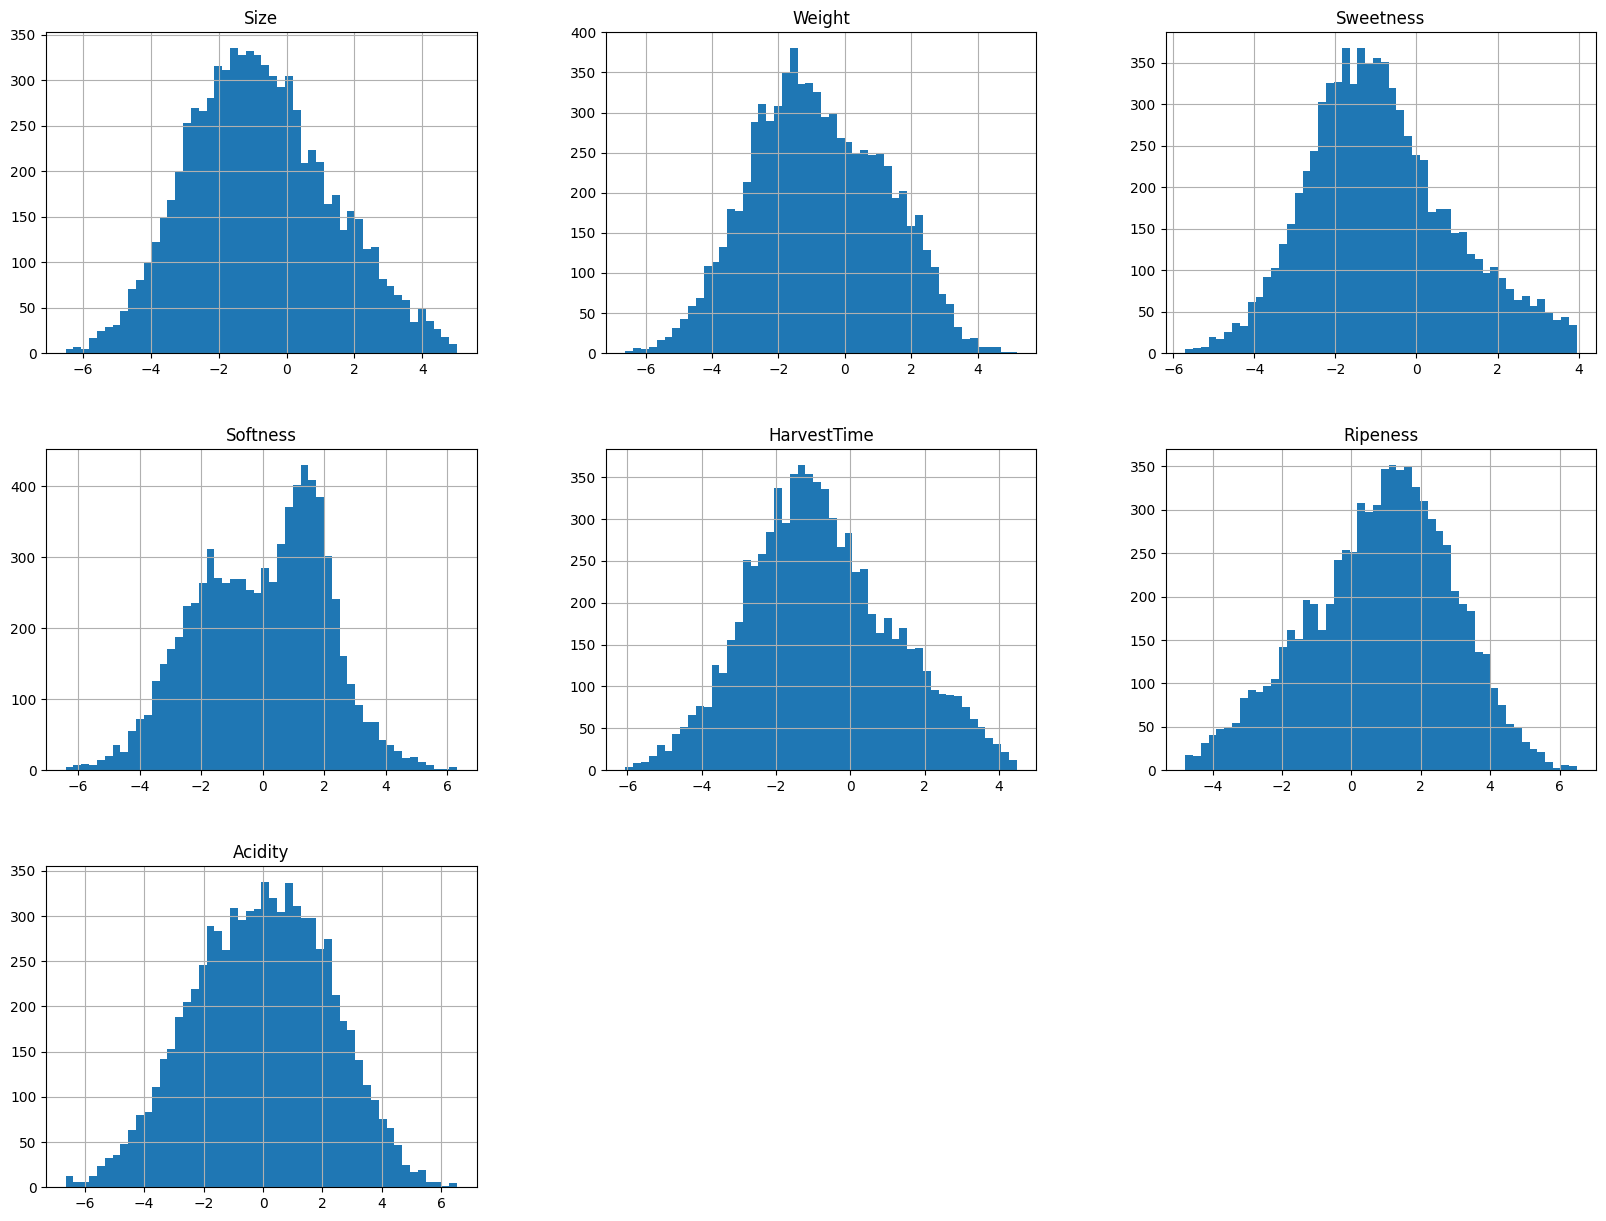

In [46]:
df_clean.hist(bins=50, figsize=(20,15))
plt.show()

Dari hasil visualisasi, semua distribusi terlihat normal, kecuali kolom Softness yang memiliki distribusi bimodal. Dengan adanya distribusi bimodal akan membingungkan model machine learning. Untuk itu, sebaiknya kolom Softness dibuang nantinya.

### 3.3 Heatmap Kolerasi

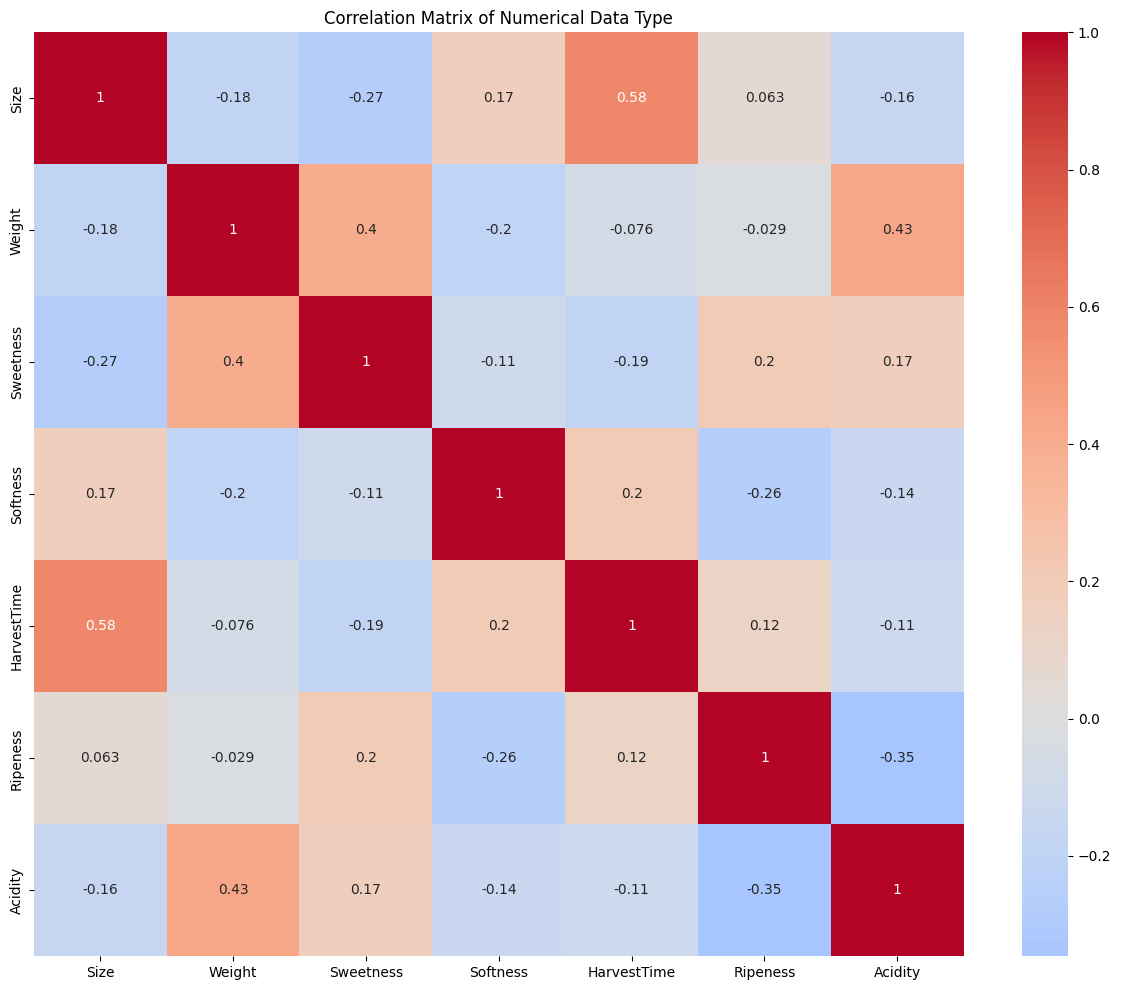

In [48]:
# Heatmap korelasi
df_clean.select_dtypes(exclude='object').corr()
plt.figure(figsize=(15, 12))
sns.heatmap(df_clean.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm',center=0)
plt.title("Correlation Matrix of Numerical Data Type")
plt.show()

Dari heatmap, hubungan antar variabel cukup renggang dan tidak ada hubungan yang sangat kuat.

### 3.4 Distribusi Kolom Kategorikal (Quality)

<ipython-input-49-70c64ba7cda1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Quality', palette='Set2')


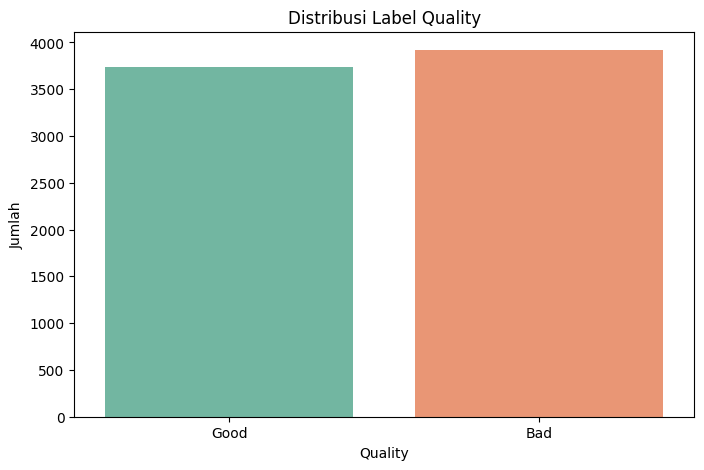

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='Quality', palette='Set2')
plt.title("Distribusi Label Quality")
plt.xlabel("Quality")
plt.ylabel("Jumlah")
plt.show()

Distribusi Label cukup merata

## 4. Data Preprocessing

### 4.1 Encoding

Tahap ini dilakukan karena model machine learning hanya bisa memproses data numerik. Kolom Quality masih berupa data kategori (misalnya "Good", "Bad"), jadi harus diubah ke angka (misalnya 1 dan 0) agar bisa digunakan dalam pelatihan model.

In [20]:
enc = LabelEncoder()
df_clean['Quality'] = enc.fit_transform(df_clean['Quality'])

### 4.2 Normalisasi

Tahap ini dilakukan untuk menstandarisasi kolom numerik (kecuali Quality) agar semua fitur memiliki skala yang sama. Ini penting karena fitur dengan skala besar bisa mendominasi model. Dengan StandardScaler(), semua nilai dikonversi menjadi distribusi dengan mean = 0 dan standar deviasi = 1, sehingga model bisa belajar lebih efektif.

In [21]:
numerical_cols = df_clean.select_dtypes(exclude=['object']).columns.drop(['Quality'])

# Scale numerical columns
scaler = StandardScaler()
df_scaled = df_clean.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

Berikut adalah gambaran dataset setelah dilakukan normalisasi

In [22]:
df_scaled.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-0.543577,0.635744,2.208921,-0.693060,0.543449,0.776939,0.136629,1
1,-0.774746,0.645187,0.679619,-1.185792,-0.064284,0.598322,0.152549,1
2,0.203819,1.145855,1.363672,-1.258068,0.061125,1.094875,0.647350,1
3,-0.039811,1.187577,1.543517,-0.597485,-0.122683,0.503900,0.227890,1
4,0.685167,1.063453,0.472767,-0.566632,-0.339977,0.118218,1.259280,1


### 4.3 Splitting Data

Tahap ini memisahkan data menjadi fitur (X) dan target (y), lalu membagi data menjadi data latih (train) dan data uji (test).

Kolom Softness dibuang karena distribusinya **bimodal**, yang bisa menunjukkan dua kelompok berbeda dan berpotensi membingungkan model. Dengan menghapusnya, model bisa fokus pada fitur yang lebih konsisten dan informatif.
test_size=0.3 berarti 30% data digunakan untuk pengujian, dan random_state=42 memastikan hasil pembagian tetap sama setiap kali dijalankan.

In [23]:
X = df_scaled.drop(columns=['Quality', 'Softness'])
y = df_scaled['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Modelling

Tujuan model ini dibangun adalah untuk mengklasifikasikan kualitas pisang berdasarkan sifat fisik dan kimiawi nya. Oleh karena itu, digunakan algoritma untuk klasifikasi.

### 5.1 Membangun model dengan Logistic Regression

In [24]:
model_lr = LogisticRegression(max_iter=10000,solver='saga', random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42, solver='saga')

### 5.2 Membangun model dengan KNN

In [25]:
model_knn = KNeighborsClassifier(n_neighbors=5)  # Gunakan k=5 sebagai default
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

### 5.3 Membangun model dengan Random Forest Classifier

In [26]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 5.4 Evaluasi Model Klasifikasi

#### 5.4.1 Prediksi dengan data uji

In [27]:
y_pred_lr = model_lr.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

#### 5.4.2 Menghitung Metrik Evaluasi Model

In [28]:
# Membuat fungsi untuk evaluasi model
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"🔘 {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score: {f1:.4f}\n")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("=" * 60)
    print()

In [29]:
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("KNN Classifier", y_test, y_pred_knn)
evaluate_model("Random Forest Classifier", y_test, y_pred_rf)

🔘 Logistic Regression
Accuracy: 0.8755
F1-Score: 0.8755

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      1157
           1       0.87      0.88      0.87      1141

    accuracy                           0.88      2298
   macro avg       0.88      0.88      0.88      2298
weighted avg       0.88      0.88      0.88      2298


🔘 KNN Classifier
Accuracy: 0.9487
F1-Score: 0.9487

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1157
           1       0.95      0.95      0.95      1141

    accuracy                           0.95      2298
   macro avg       0.95      0.95      0.95      2298
weighted avg       0.95      0.95      0.95      2298


🔘 Random Forest Classifier
Accuracy: 0.9443
F1-Score: 0.9443

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94   

### 5.5 Melakukan Hypertuning menggunakan GridSearchCV

#### 5.5.1 Hypertuning algoritma KNN

In [30]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],  # Jumlah tetangga
    'weights': ['uniform', 'distance'],  # Metode pembobotan
    'metric': ['euclidean', 'manhattan'],  # Jenis metrik jarak
    'p': [1, 2] # Parameter untuk metrik jarak
}

# Grid Search dengan 5-fold Cross-Validation
grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Training model dengan hyperparameter tuning
grid_search_knn.fit(X_train, y_train)

# Best parameters dan hasil evaluasi
print("Parameter terbaik untuk KNN:", grid_search_knn.best_params_)
best_knn = grid_search_knn.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Parameter terbaik untuk KNN: {'metric': 'euclidean', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}


#### 5.5.2 Hypertuning algoritma Random Forest

In [31]:
param_grid_rf = {
    'n_estimators': [100, 200],         # Jumlah pohon
    'max_depth': [None, 10, 20],        # Kedalaman maksimum pohon
    'min_samples_split': [2, 5],        # Minimum sampel untuk split
    'min_samples_leaf': [1, 2],         # Minimum sampel di daun
    'bootstrap': [True, False]          # Apakah bootstrap digunakan
}

# Grid Search dengan 5-fold cross-validation
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Melatih model dengan hyperparameter tuning
grid_search_rf.fit(X_train, y_train)

# Menampilkan parameter terbaik dan model terbaik
print("Parameter terbaik untuk Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Parameter terbaik untuk Random Forest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


#### 5.5.3 Prediksi hasil hypertuning menggunakan data uji

In [32]:
y_pred_knn_best = best_knn.predict(X_test)
y_pred_rf_best = best_rf.predict(X_test)

#### 5.5.4 Evaluasi model hasil hypertuning

In [33]:
evaluate_model("KNN Classifier  Setelah Tuning", y_test, y_pred_knn_best)
evaluate_model("Random Forest Classifier Setelah Tuning", y_test, y_pred_rf_best)

🔘 KNN Classifier  Setelah Tuning
Accuracy: 0.9530
F1-Score: 0.9530

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1157
           1       0.95      0.96      0.95      1141

    accuracy                           0.95      2298
   macro avg       0.95      0.95      0.95      2298
weighted avg       0.95      0.95      0.95      2298


🔘 Random Forest Classifier Setelah Tuning
Accuracy: 0.9439
F1-Score: 0.9439

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1157
           1       0.94      0.95      0.94      1141

    accuracy                           0.94      2298
   macro avg       0.94      0.94      0.94      2298
weighted avg       0.94      0.94      0.94      2298




Dapat disimpulkan, bahwa algoritma KNN paling unggul dibanding algoritma lain, dengan akurasi sebesar 0,9530 yang digolongkan sangat akurat.